# **multi-stage routed workflow**

In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    num1: float
    num2: float
    operation1: str
    num3: float
    num4: float
    operation2: str
    result: str

### **nodes for router 1**


In [3]:
def add_node1(state: AgentState) -> AgentState:
    state['result'] = "Addition of two numbers are: " + \
        str(state['num1'] + state['num2'])
    return state


def sub_node1(state: AgentState) -> AgentState:
    state['result'] = "Subtraction of two numbers are: " + \
        str(state['num1'] - state['num2'])
    return state


def multiply_node1(state: AgentState) -> AgentState:
    state['result'] = "Multiplication of two numbers are: " + \
        str(state['num1'] * state['num2'])
    return state


def divide_node1(state: AgentState) -> AgentState:
    state['result'] = "Division of two numbers are: " + \
        str(state['num1'] / state['num2'])
    return state


def power_node1(state: AgentState) -> AgentState:
    state['result'] = "Power of two numbers are: " + \
        str(state['num1'] ** state['num2'])
    return state

### **nodes for router 2**


In [4]:
def add_node2(state: AgentState) -> AgentState:
    state['result'] += " Addition of two numbers are: " + \
        str(state['num3'] + state['num4'])
    return state


def sub_node2(state: AgentState) -> AgentState:
    state['result'] += " Subtraction of two numbers are: " + \
        str(state['num3'] - state['num4'])
    return state


def multiply_node2(state: AgentState) -> AgentState:
    state['result'] += " Multiplication of two numbers are: " + \
        str(state['num3'] * state['num4'])
    return state


def divide_node2(state: AgentState) -> AgentState:
    state['result'] += " Division of two numbers are: " + \
        str(state['num3'] / state['num4'])
    return state


def power_node2(state: AgentState) -> AgentState:
    state['result'] += " Power of two numbers are: " + \
        str(state['num3'] ** state['num4'])
    return state

### **router 1**


In [5]:
def router_node1(state: AgentState) -> AgentState:
    """Router node - here we are just comparing the stuff here, we are not assigning anything"""

    if state["operation1"] == "+":
        # here we do not return functions, we return edges that we create later.
        return "addition_operation1"

    elif state["operation1"] == "-":
        return "subtraction_operation1"

    elif state["operation1"] == "*":
        return "multiplication_operation1"

    elif state["operation1"] == "/":
        return "division_operation1"

    elif state["operation1"] == "**":
        return "power_operation1"

    else:
        return "Invalid operation!"

### **router 2**


In [6]:
def router_node2(state: AgentState) -> AgentState:
    """Router node - here we are just comparing the stuff here, we are not assigning anything"""

    if state["operation2"] == "+":
        # here we do not return functions, we return edges that we create later.
        return "addition_operation2"

    elif state["operation2"] == "-":
        return "subtraction_operation2"

    elif state["operation2"] == "*":
        return "multiplication_operation2"

    elif state["operation2"] == "/":
        return "division_operation2"

    elif state["operation2"] == "**":
        return "power_operation2"

    else:
        return "Invalid operation!"

In [7]:
graph = StateGraph(AgentState)

# nodes for router 1
graph.add_node("add_node1", add_node1)
graph.add_node("sub_node1", sub_node1)
graph.add_node("multiply_node1", multiply_node1)
graph.add_node("divide_node1", divide_node1)
graph.add_node("power_node1", power_node1)

# nodes for router 2
graph.add_node("add_node2", add_node2)
graph.add_node("sub_node2", sub_node2)
graph.add_node("multiply_node2", multiply_node2)
graph.add_node("divide_node2", divide_node2)
graph.add_node("power_node2", power_node2)

# router nodes 1 & 2
graph.add_node("router1", lambda state: state)
graph.add_node("router2", lambda state: state)

In [8]:
# starting point to router node 1
graph.add_edge(START, "router1")

# router node 1 to operation nodes
graph.add_conditional_edges(
    source="router1",
    path=router_node1,

    # edge: node mapping
    path_map={
        "addition_operation1": "add_node1",
        "subtraction_operation1": "sub_node1",
        "multiplication_operation1": "multiply_node1",
        "division_operation1": "divide_node1",
        "power_operation1": "power_node1",
    }
)

# operation nodes to router node 2
graph.add_edge("add_node1", "router2")
graph.add_edge("sub_node1", "router2")
graph.add_edge("multiply_node1", "router2")
graph.add_edge("divide_node1", "router2")
graph.add_edge("power_node1", "router2")

# router node 2 to operation nodes
graph.add_conditional_edges(
    source="router2",
    path=router_node2,

    # edge: node mapping
    path_map={
        "addition_operation2": "add_node2",
        "subtraction_operation2": "sub_node2",
        "multiplication_operation2": "multiply_node2",
        "division_operation2": "divide_node2",
        "power_operation2": "power_node2",
    }
)

# operation nodes to end point
graph.add_edge("add_node2", END)
graph.add_edge("sub_node2", END)
graph.add_edge("multiply_node2", END)
graph.add_edge("divide_node2", END)
graph.add_edge("power_node2", END)

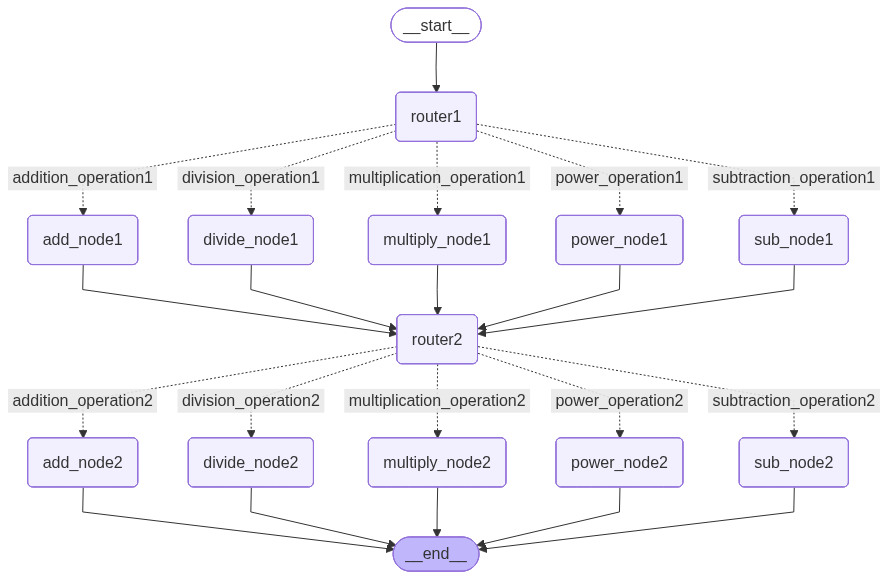

In [9]:
app = graph.compile()
app

In [10]:
response = app.invoke({
    "num1": 10,
    "num2": 5,
    "operation1": "+",
    "num3": 10,
    "num4": 5,
    "operation2": "-",
})

In [11]:
response["result"]

'Addition of two numbers are: 15 Subtraction of two numbers are: 5'